# Tutorial 2

## Excercise 1

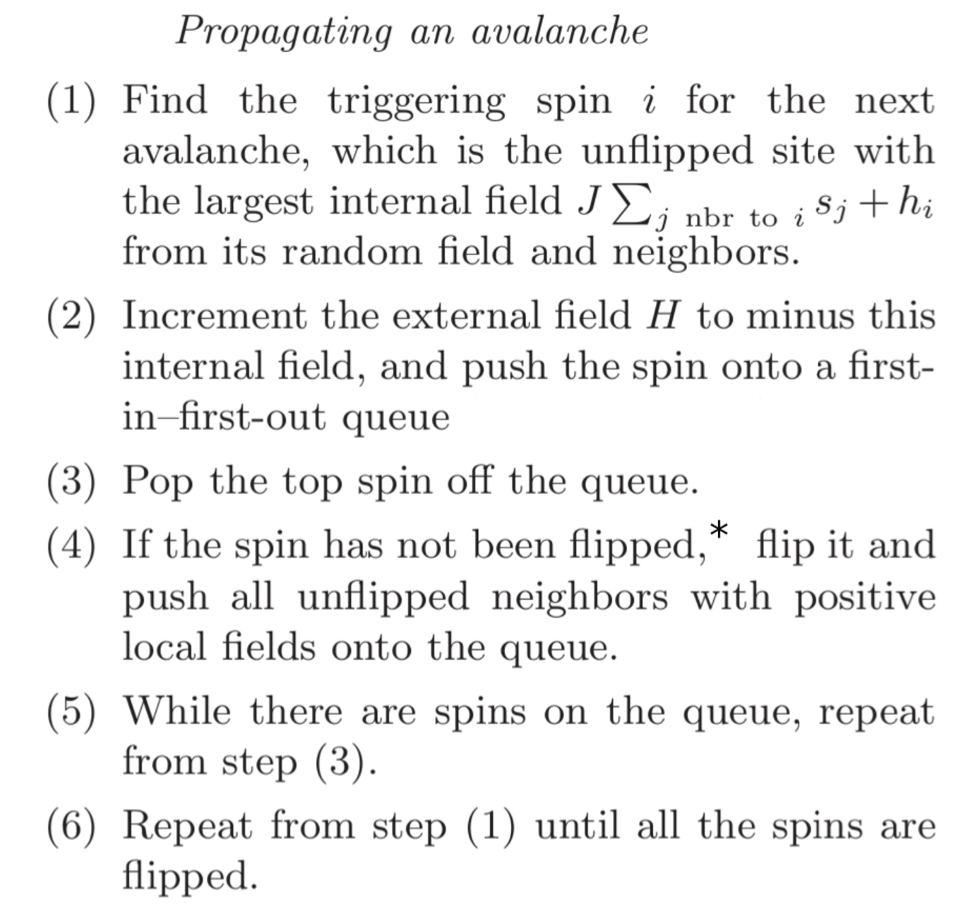

In [11]:
%load_ext line_profiler
%load_ext snakeviz

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numba import jit

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


The function for calculating indices of the neighbouring spins

In [2]:
def neighbours(i):
    ix, iy = i
    return[ (ix,(iy+1)%L),(ix,(iy-1)%L), ((ix+1)%L,iy),((ix-1)%L,iy) ]
    # The modulo division above takes care of the boundaries, a neighbour of the topmost spin is bottmomost spin

The function for flipping the spin, and adjusting the local field of the neighbours

In [3]:
def update(i):
    s[i] = 1
    for j in neighbours(i):
        h_loc[j] += 2.0
    return

Fist in, first out queue, as mentioned in the algorithm

**The procedure itself**

In [38]:
# find the triggering spin
def find_trig():
    return np.unravel_index(np.argmax(h_loc + (s+1)*(-100)), h_loc.shape)
# The + (s+1)*(-100) part is responsible for cancelling out the already flipped spins

In [5]:
def aval_it():
    aval_num = 1
    while np.min(s) == -1:
        i_trig = find_trig()
        # increment the external field
        H = - h_loc[i_trig]
        d = []
        d.append(i_trig)
        while d:
            i_tmp = d.pop()
            if s[i_tmp] == -1:
                update(i_tmp)
                aval[i_tmp] = aval_num
                for j in neighbours(i_tmp):
                    if h_loc[j] + H > 0 and s[j] == -1:
                        d.append(j)
        aval_num += 1
        M = np.sum(s)/(L**2)
        M_tab.append(M)
        H_tab.append(H)

    unique, counts = np.unique(aval, return_counts=True)
    count = dict(zip(unique, counts))
    return count

In [39]:
def aval_it_1_aval():
    i_trig = find_trig()
    # increment the external field
    H = - h_loc[i_trig]
    d = []
    d.append(i_trig)
    while d:
        i_tmp = d.pop()
        if s[i_tmp] == -1:
            update(i_tmp)
            aval[i_tmp] = 1
            for j in neighbours(i_tmp):
                if h_loc[j] + H > 0 and s[j] == -1:
                    d.append(j)

    unique, counts = np.unique(aval, return_counts=True)
    count = dict(zip(unique, counts))
    return count[1]

In [49]:
# the list for keeping plots of all iterations
AV = []
AV_size = []

# Input data
L = 100
R_tab_1 = [0.7, 0.9, 1.4]
it_num = 1000
mean_size = []

for i, R in enumerate(R_tab_1):
    print(R)
    mean_av = []
    for it in range(it_num):
        # lattice of spins
        s = np.ones( (L, L), dtype=int ) * (-1)
        # recording of avalanches
        aval = np.zeros( (L, L), dtype=int )
        # random magnetic fields
        h_rnd = np.random.randn(L, L) * R
        # ... and the local fields
        h_loc = np.ones( (L, L), dtype=int ) * (-4.0) + h_rnd

        aval_size = aval_it_1_aval()
        AV_size.append(aval_size)
        AV.append(aval)
        mean_av.append(aval_size)
    mean_av = np.mean(mean_av)
    mean_size.append(mean_av)

0.7
0.9
1.4


In [50]:
mean_size

[707.39, 1.439, 1.041]

## Task 2

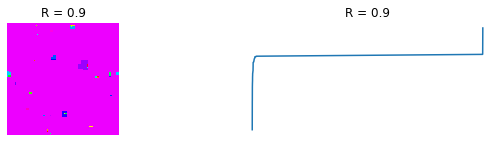

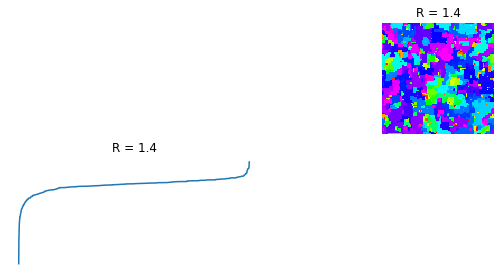

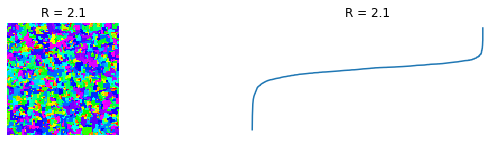

In [167]:
# the list for keeping plots of all iterations
AV = []
AV_size = []

# Input data
M = -0.1
L = 100
R_tab = [0.9, 1.4, 2.1]


for i, R in enumerate(R_tab):
    M_tab = []
    H_tab = []
    i+=1
    # lattice of spins
    s = np.ones( (L, L), dtype=int ) * (-1)
    # recording of avalanches
    aval = np.zeros( (L, L), dtype=int )
    # random magnetic fields
    h_rnd = np.random.randn(L, L) * R
    # ... and the local fields
    h_loc = np.ones( (L, L), dtype=int ) * (-4.0) + h_rnd

    aval_size = aval_it()
    
    # create figure
    fig = plt.figure(figsize=(10, 7))

    # setting values to rows and column variables
    rows = 3
    columns = 2

    fig.add_subplot(rows, columns, i)
    plt.imshow(aval,interpolation='none',cmap=cm.gist_rainbow)
    plt.axis('off')
    plt.title(f"R = {R}")
    
    fig.add_subplot(rows, columns, i+1)
    plt.plot(M_tab, H_tab)
    plt.axis('off')
    plt.title(f"R = {R}")

In [ ]:
# %snakeviz %lprun -f aval_it aval_it()